In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import xgboost as xgb
from bayes_opt import BayesianOptimization

In [3]:
data = pd.read_csv('../data/advertisements/ad.data', header=None, on_bad_lines='skip')
data.head(10)

C:\Users\zippen\AppData\Local\Temp\ipykernel_13428\3798430458.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/advertisements/ad.data', header=None, on_bad_lines='skip')


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [4]:
data.rename(columns={0:'height', 1: 'width', 2: 'ratio(width/height)',1558: 'label'}, inplace=True)
data.head()

,height,width,ratio(width/height),3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,label
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [5]:
data = data.replace('[?]', np.nan, regex=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to label
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [6]:
missing_count = data.isna().sum()
missing_count = missing_count[missing_count > 0]
print(missing_count[missing_count > 0])

height                 903
width                  901
ratio(width/height)    910
3                       15
dtype: int64


In [7]:
null_columns = list(missing_count.index)
data.label.value_counts()

label
nonad.    2820
ad.        459
Name: count, dtype: int64

In [8]:
data[null_columns]  = data[null_columns].astype('float')

In [9]:
data.label = data.label.replace(['ad.','nonad.'],[1,0])
data.label.value_counts()

C:\Users\zippen\AppData\Local\Temp\ipykernel_13428\1815249773.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.label = data.label.replace(['ad.','nonad.'],[1,0])


label
0    2820
1     459
Name: count, dtype: int64

In [10]:
y = data.label
X = data.drop(columns='label')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=24)
X_train.describe()

,height,width,ratio(width/height),3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
count,1782.000000,1786.000000,1779.000000,2448.000000,2459.000000,2459.000000,2459.00000,2459.000000,2459.000000,2459.000000,...,2459.00000,2459.000000,2459.000000,2459.000000,2459.00000,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,64.317059,156.138298,3.864639,0.773284,0.005287,0.011387,0.00366,0.004067,0.004067,0.011793,...,0.00610,0.004473,0.004067,0.002440,0.00366,0.005693,0.012607,0.013013,0.010573,0.001220
std,55.498293,129.374290,5.724463,0.418793,0.072532,0.106121,0.06040,0.063654,0.063654,0.107977,...,0.07788,0.066747,0.063654,0.049346,0.06040,0.075255,0.111592,0.113355,0.102303,0.034914
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,82.250000,1.039050,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,110.000000,2.140000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.750000,195.500000,5.333300,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
y_train.value_counts()

label
0    2109
1     350
Name: count, dtype: int64

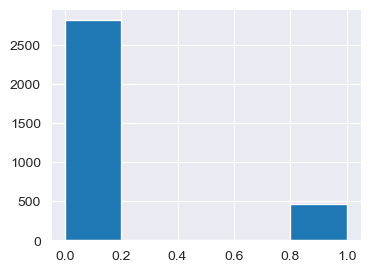

In [12]:
y.hist(bins=5, figsize=(4,3))
plt.show()

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'ratio(width/height)'}>, <Axes: >]],
      dtype=object)

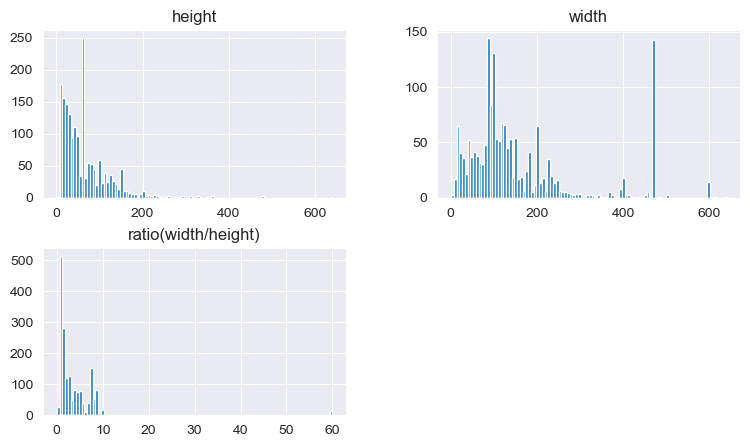

In [13]:
cont_feas = ['height', 'width', 'ratio(width/height)']
X_train.hist(column=cont_feas, bins=100, figsize=(9,5))

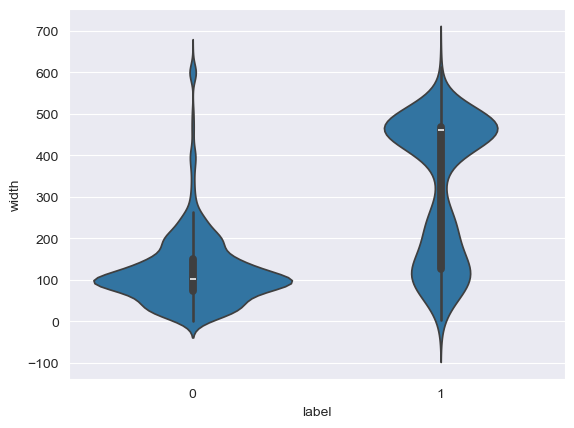

In [14]:
sns.violinplot(x='label', y='width', data=data)
plt.show()

<Axes: xlabel='label', ylabel='height'>

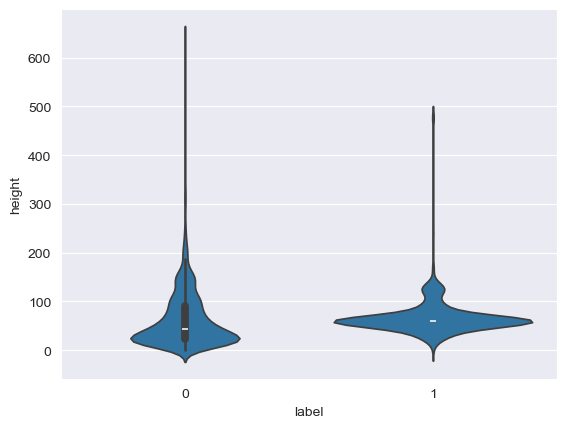

In [15]:
sns.violinplot(x='label', y='height', data=data)

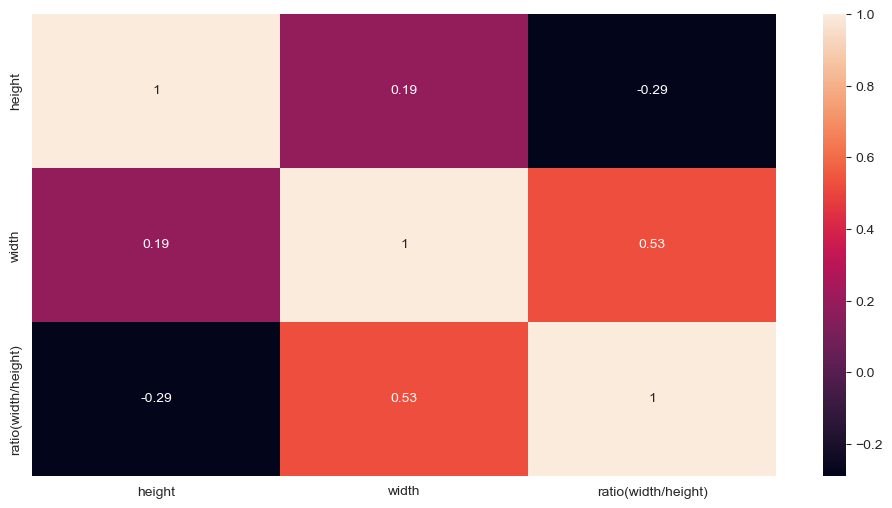

In [16]:
plt.subplots(figsize=(12,6))
corr = X_train[cont_feas].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [17]:
X_train_d = X_train.copy(deep=True).dropna()
X_test_d = X_test.copy(deep=True).dropna()
X_train_d['label'] = 1
X_test_d['label'] = 0
print(X_train_d.shape)

(1772, 1559)


In [18]:
all_data_d = pd.concat([X_train_d, X_test_d],axis=0)
print(all_data_d.shape)
all_data_d.reset_index(drop=True, inplace=True)
all_data_d.label.value_counts()

(2359, 1559)


label
1    1772
0     587
Name: count, dtype: int64

In [19]:
all_data_d.sample(frac=1, random_state=24).reset_index(drop=True, inplace=True)
X_d = all_data_d.drop(columns='label')
y_d = all_data_d.label
X_d_train,X_d_test,y_d_train,y_d_test = model_selection.train_test_split(X_d, y_d, test_size=0.25, random_state=24)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X_d_train.columns = X_d_train.columns.astype('str')
X_d_test.columns = X_d_test.columns.astype('str')
clf = LogisticRegression(random_state=24)
clf.fit(X_d_train, y_d_train)
y_pred_d = clf.predict(X_d_test)
linear_auc_d = metrics.roc_auc_score(y_d_test,y_pred_d)
print(f'Logistic Regression AUC: {linear_auc_d}')

clf2 =DecisionTreeClassifier(random_state=24)
clf2.fit(X_d_train, y_d_train)
y_pred_d_tree = clf2.predict(X_d_test)
tree_auc_d = metrics.roc_auc_score(y_d_test,y_pred_d_tree)
print(f'Decision Tree AUC: {tree_auc_d}')


F:\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC: 0.4987617708205943
Decision Tree AUC: 0.4971413721413721


In [21]:
X_d.columns = X_d.columns.astype('str')
scores = model_selection.cross_val_score(clf2, X_d, y_d, cv=5,scoring='roc_auc')
print(f'auc mean: {scores.mean():.2f} +- {scores.std():.2f}')

auc mean: 0.49 +- 0.01


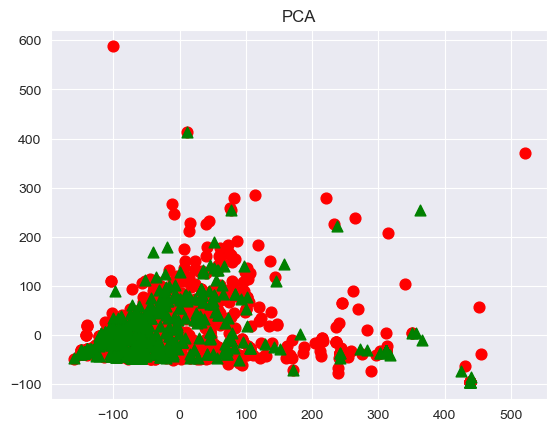

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_d)
pos_mask = y_d > 0
neg_mask = y_d <= 0
X_pos_pca = X_pca[pos_mask]
X_neg_pca = X_pca[neg_mask]

plt.scatter(X_pos_pca[:,0], X_pos_pca[:,1], c='r',marker='o', s=60)
plt.scatter(X_neg_pca[:,0], X_neg_pca[:,1], c='g', marker='^', s=60)
plt.title('PCA')
plt.show()

In [23]:
print(type(data.label.value_counts()))

<class 'pandas.core.series.Series'>


In [24]:
pos_label, neg_label = data.label.value_counts()[0], data.label.value_counts()[1]
scale_pos_weight = neg_label/pos_label
print(scale_pos_weight)

0.16276595744680852


In [26]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'booster': 'gbtree',
    'nthread': -1,
    'eta': 0.1,
    'gamma': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': scale_pos_weight,
}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dtest, 'test')]
num_round = 100
bst = xgb.train(params, dtrain,num_boost_round= num_round, evals= watchlist)

[0]	train-auc:0.91369	test-auc:0.90606
[1]	train-auc:0.93554	test-auc:0.92450
[2]	train-auc:0.94571	test-auc:0.92333
[3]	train-auc:0.94532	test-auc:0.92257
[4]	train-auc:0.94502	test-auc:0.92248
[5]	train-auc:0.94505	test-auc:0.92672
[6]	train-auc:0.94468	test-auc:0.92645
[7]	train-auc:0.94427	test-auc:0.92610
[8]	train-auc:0.94392	test-auc:0.92585
[9]	train-auc:0.94471	test-auc:0.92543
[10]	train-auc:0.94456	test-auc:0.92898
[11]	train-auc:0.94433	test-auc:0.92892
[12]	train-auc:0.94544	test-auc:0.92799
[13]	train-auc:0.94533	test-auc:0.92782
[14]	train-auc:0.94618	test-auc:0.92710
[15]	train-auc:0.94621	test-auc:0.92727
[16]	train-auc:0.94603	test-auc:0.92752
[17]	train-auc:0.94588	test-auc:0.92692
[18]	train-auc:0.94603	test-auc:0.92768
[19]	train-auc:0.94499	test-auc:0.92654
[20]	train-auc:0.94555	test-auc:0.92682
[21]	train-auc:0.94544	test-auc:0.92686
[22]	train-auc:0.94568	test-auc:0.92689
[23]	train-auc:0.94986	test-auc:0.92154
[24]	train-auc:0.95387	test-auc:0.92312
[25]	train

In [27]:
y_pred = bst.predict(dtest)
auc_score = metrics.roc_auc_score(y_test,y_pred)
print(auc_score)

0.9651543890888915


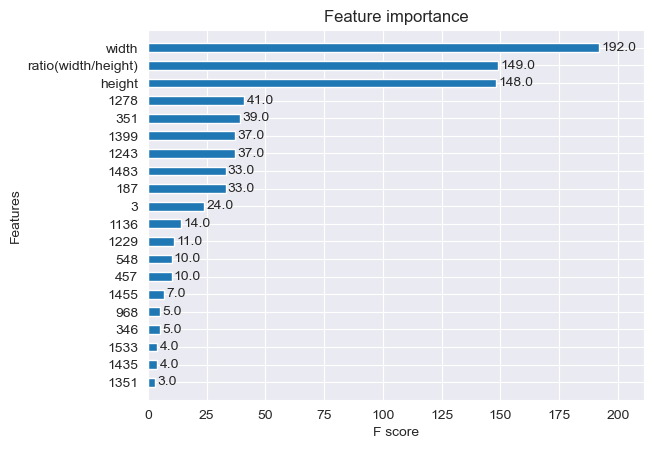

In [29]:
xgb.plot_importance(bst,max_num_features=20,importance_type='weight',height=0.5)
plt.show()

In [38]:
def xgb_optimization(
        n_estimators,
        learning_rate,
        gamma,
        max_depth,
        min_child_weight,
        subsample,
        colsample_bytree,
        alpha
):
    params = {}
    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'auc'
    params['booster'] = 'gbtree'
    params['learning_rate'] = float(learning_rate)
    params['gamma'] = float(gamma)
    params['max_depth'] = int(max_depth)
    params['min_child_weight'] = int(min_child_weight)
    params['subsample'] = float(subsample)
    params['colsample_bytree'] = float(colsample_bytree)
    params['alpha'] = float(alpha)
    n_estimators = int(n_estimators)
    
    cv_results = xgb.cv(params,dtrain,num_boost_round=n_estimators,metrics=['auc'],early_stopping_rounds=20,seed=24)
    return cv_results['test-auc-mean'].iloc[-1]

In [39]:
pbounds = {
    'n_estimators': (100, 200),
    'learning_rate': (0.05,0.2),
    'gamma': (0,10),
    'max_depth': (4, 11),
    'min_child_weight': (1, 5),
    'subsample': (0.5,1),
    'colsample_bytree': (0.5,1),
    'alpha': (0, 10),
}
xgb_opt = BayesianOptimization(xgb_optimization,pbounds)
xgb_opt.maximize(init_points=5, n_iter=30)

|   iter    |  target   |   alpha   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.952     | 4.01      | 0.9361    | 4.231     | 0.1857    | 4.826     | 4.329     | 187.1     | 0.6159    |
| 2         | 0.9623    | 3.037     | 0.6206    | 0.07484   | 0.09089   | 6.613     | 3.342     | 114.0     | 0.5036    |
| 3         | 0.9538    | 5.499     | 0.8969    | 2.617     | 0.1814    | 5.173     | 2.429     | 107.3     | 0.9254    |
| 4         | 0.9532    | 6.383     | 0.8437    | 2.513     | 0.1591    | 5.825     | 4.896     | 178.5     | 0.8358    |
| 5         | 0.9544    | 3.627     | 0.6448    | 3.102     | 0.1009    | 6.854     | 4.801     | 175.2     | 0.715     |
| 6         | 0.9606    | 1.98      | 0.5035    | 0.0       | 0.05288   | 7.23      | 3.733     | 116.9     | 0.5       |
| 7         | 0.9523    

In [49]:
bay_params = xgb_opt.max['params']
bay_params['max_depth'] = int(bay_params['max_depth'])
bay_params['min_child_weight'] = int(bay_params['min_child_weight'])
bay_params['eval_metric'] = 'auc'
print(bay_params)
num_boost_round = int(bay_params.pop('n_estimators'))

{'alpha': np.float64(0.0), 'colsample_bytree': np.float64(1.0), 'gamma': np.float64(0.0), 'learning_rate': np.float64(0.2), 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': np.float64(129.05670425453602), 'subsample': np.float64(1.0), 'eval_metric': 'auc'}


In [55]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]
bys_model = xgb.train(bay_params,dtrain,num_boost_round=num_boost_round,evals= watchlist,early_stopping_rounds=30)
best_iter = bys_model.best_iteration
bys_model = bys_model[:best_iter]
y_pred = bys_model.predict(dtest)
auc_score = metrics.roc_auc_score(y_test,y_pred)
print(f'best_iter: {best_iter} and best auc score: {auc_score}')

[0]	train-auc:0.95206	test-auc:0.89768
[1]	train-auc:0.96201	test-auc:0.91519
[2]	train-auc:0.96501	test-auc:0.91517
[3]	train-auc:0.96653	test-auc:0.91521
[4]	train-auc:0.96684	test-auc:0.91570
[5]	train-auc:0.97379	test-auc:0.92075
[6]	train-auc:0.97961	test-auc:0.93843
[7]	train-auc:0.98111	test-auc:0.94279
[8]	train-auc:0.98127	test-auc:0.93414
[9]	train-auc:0.98482	test-auc:0.93984
[10]	train-auc:0.98467	test-auc:0.93866
[11]	train-auc:0.98743	test-auc:0.93884
[12]	train-auc:0.98744	test-auc:0.93884
[13]	train-auc:0.99014	test-auc:0.93895
[14]	train-auc:0.99153	test-auc:0.93834
[15]	train-auc:0.99394	test-auc:0.94484
[16]	train-auc:0.99972	test-auc:0.95443
[17]	train-auc:0.99976	test-auc:0.95408
[18]	train-auc:0.99978	test-auc:0.95453
[19]	train-auc:0.99979	test-auc:0.96074
[20]	train-auc:0.99979	test-auc:0.96087
[21]	train-auc:0.99995	test-auc:0.96102
[22]	train-auc:0.99995	test-auc:0.96141
[23]	train-auc:0.99996	test-auc:0.96105
[24]	train-auc:0.99996	test-auc:0.96090
[25]	train